# Data Pre-Process & Exploration

In [1]:
! git clone https://github.com/Ironarrow98/dengue_data

Cloning into 'dengue_data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

test_features = pd.read_csv("/content/dengue_data/dengue_features_test.csv")
train_features = pd.read_csv("/content/dengue_data/dengue_features_train.csv")
train_target = pd.read_csv("/content/dengue_data/dengue_labels_train.csv")

train_features.shape

(1456, 24)

In [3]:
print("Train Features: ")
print(train_features.isnull().sum())
print("\n")
print("Test Features: ")
print(test_features.isnull().sum())

Train Features: 
city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                    

In [4]:
train_features = train_features.interpolate(method = 'linear')
test_features = test_features.interpolate(method = 'linear')

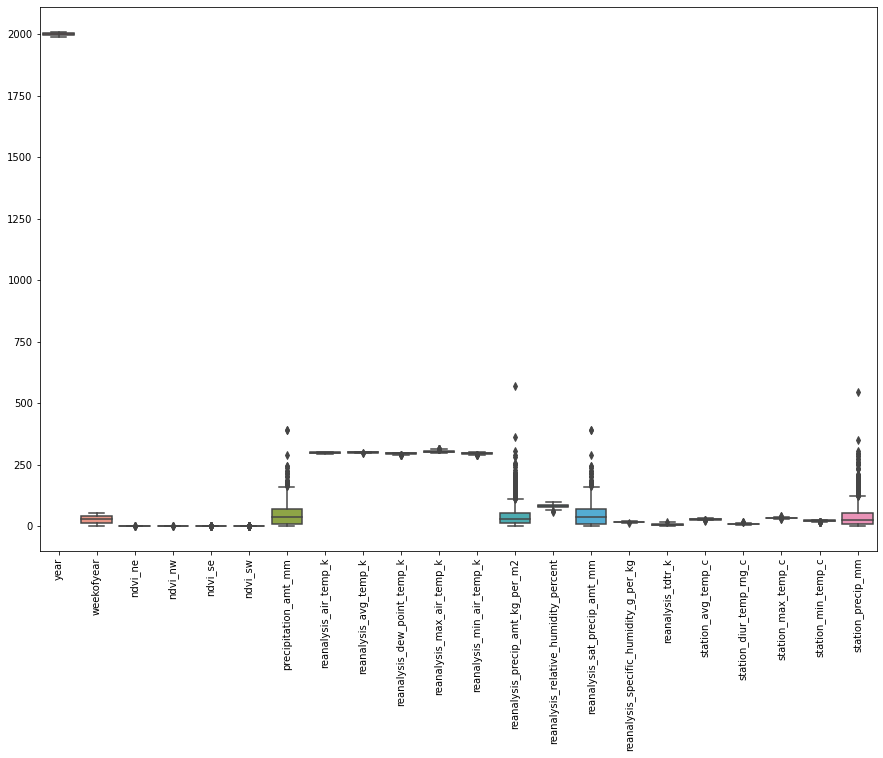

In [5]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, data=train_features)
ax.tick_params(axis='x', rotation=90)
plt.show()

In [6]:
sj_train = train_features[train_features.city=='sj'].drop('city', 1)
sj_target = train_target[train_target.city=='sj'].drop('city', 1)
sj_test = test_features[test_features.city=='sj'].drop('city', 1)

iq_train = train_features[train_features.city=='iq'].drop('city', 1)
iq_target = train_target[train_target.city=='iq'].drop('city', 1)
iq_test = test_features[test_features.city=='iq'].drop('city', 1)

In [7]:
corr_sj = sj_train.corr()
corr_iq = iq_train.corr()

Text(0.5, 1.0, 'Correlation Plot of all features in the San Juan Dataset')

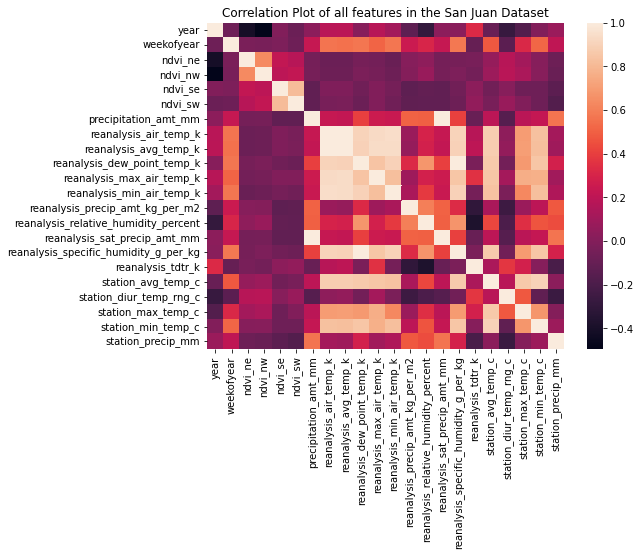

In [8]:
plt.figure(figsize=(8, 6))
corr_heatmap_sj = sns.heatmap(corr_sj)
plt.title('Correlation Plot of all features in the San Juan Dataset')

Text(0.5, 1.0, 'Correlation Plot of all features in the Iquitos Dataset')

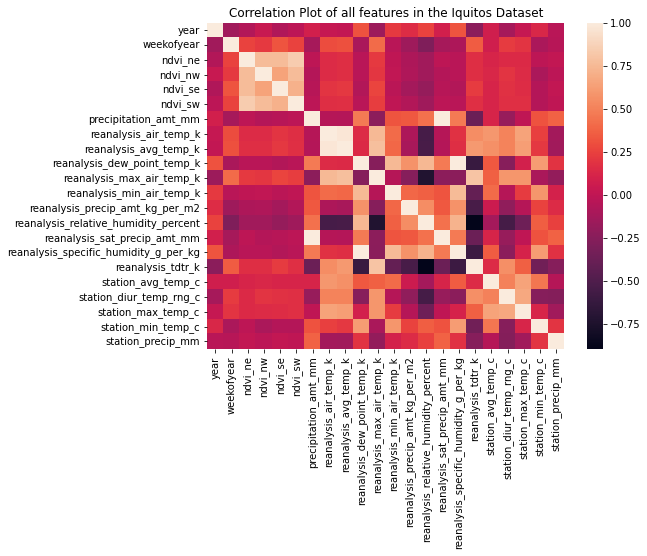

In [9]:
plt.figure(figsize=(8, 6))
corr_heatmap_iq = sns.heatmap(corr_iq)
plt.title('Correlation Plot of all features in the Iquitos Dataset')

In [10]:
upper_sj = corr_sj.where(np.triu(np.ones(corr_sj.shape), k=1).astype(np.bool))
upper_iq = corr_iq.where(np.triu(np.ones(corr_iq.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
drop_sj = [feature for feature in upper_sj.columns if any(upper_sj[feature] > 0.95) or any(upper_sj[feature] < -0.95)]
print(drop_sj)
drop_iq = [feature for feature in upper_iq.columns if any(upper_iq[feature] > 0.95) or any(upper_iq[feature] < -0.95)]
print(drop_iq)

sj_train.drop(['year'] + drop_sj, axis=1, inplace=True)
sj_test.drop(['year'] + drop_sj, axis=1, inplace=True)
iq_train.drop(['year'] + drop_iq, axis=1, inplace=True)
iq_test.drop(['year'] + drop_iq, axis=1, inplace=True)

['reanalysis_avg_temp_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg']
['reanalysis_avg_temp_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg']


In [11]:
# Convert all Kelvins to Celsius.
sj_train[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']] -= 273.15
sj_test[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']] -= 273.15
iq_train[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']] -= 273.15
iq_test[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']] -= 273.15

In [12]:
sj_train['total_cases'] = sj_target.total_cases
iq_train['total_cases'] = iq_target.total_cases

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
sj_scaled = scaler.fit_transform(sj_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1))
iq_scaled = scaler.fit_transform(iq_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1))

In [14]:
sj_scaled = pd.DataFrame(data = sj_scaled, columns = sj_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1).columns)
iq_scaled = pd.DataFrame(data = iq_scaled, columns = iq_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1).columns)

sj_scaled.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.628664,0.410562,0.376015,0.206800,-0.516022,-1.282258,-1.716084,-1.264413,-1.080799,0.044400,-1.540027,0.229673,-1.099174,0.174930,-1.277831,-1.723902,-0.368813
1,1.089652,0.831965,-0.258944,-0.190198,-0.282338,-0.765473,-0.735181,-0.390490,-0.694032,-0.351613,-0.355272,-0.286815,-0.200494,-0.457910,0.060390,-0.261731,-0.622014
2,-0.251893,1.169434,-0.349585,0.085288,-0.018994,-0.304182,0.211081,-0.708280,0.002149,-0.121779,1.031170,-0.430284,-0.200494,-0.321080,0.351308,0.137043,0.500283
3,0.687464,1.959633,0.887019,1.252061,-0.449962,-0.137701,0.131770,0.006748,-0.229912,-0.465404,0.523358,-0.172040,0.334675,0.020996,0.991327,0.469355,-0.779409
4,1.345974,2.147410,1.302569,1.457534,-0.626124,0.292375,0.458130,0.403986,0.156856,-0.513286,0.559721,1.004404,1.374720,3.133884,1.980448,0.868129,-0.717820


In [15]:
sj_scaled['total_cases'] = list(sj_target.total_cases)
iq_scaled['total_cases'] = list(iq_target.total_cases)

Text(0.5, 1.0, 'Correlation Plot of all features in the San Juan Dataset')

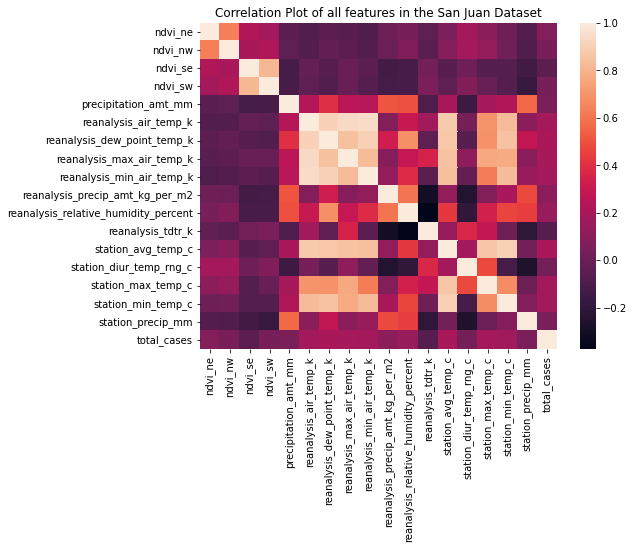

In [16]:
sj_corr = sj_scaled.corr()

plt.figure(figsize=(8, 6))
corr_heatmap_sj = sns.heatmap(sj_corr)
plt.title('Correlation Plot of all features in the San Juan Dataset')

Text(0.5, 1.0, 'Correlation Plot of all features in the Iquitos Dataset')

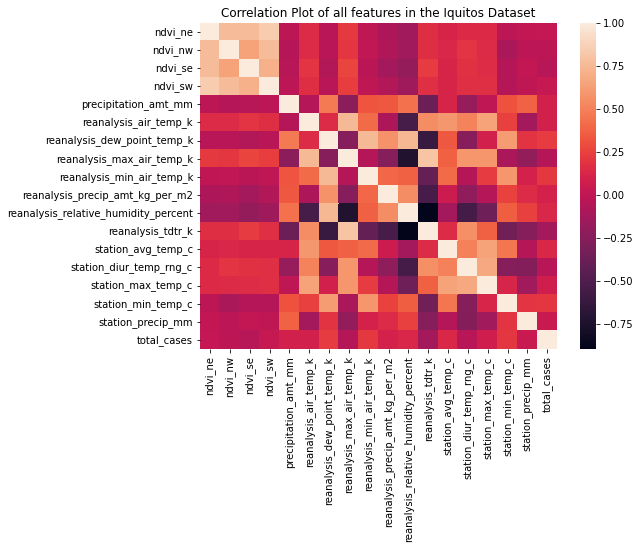

In [17]:
iq_corr = iq_scaled.corr()

plt.figure(figsize=(8, 6))
corr_heatmap_sj = sns.heatmap(iq_corr)
plt.title('Correlation Plot of all features in the Iquitos Dataset')

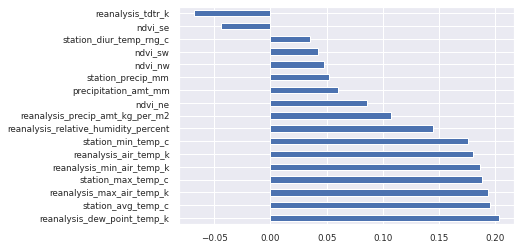

In [18]:
sns.set(font_scale = 0.8)

(sj_corr
 .total_cases
 .drop('total_cases')
 .sort_values(ascending=False)
 .plot
 .barh())

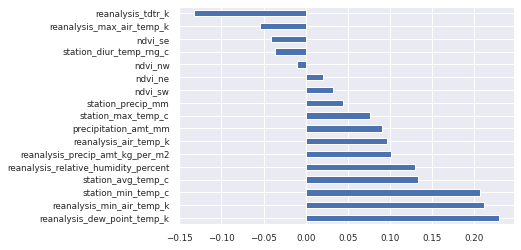

In [19]:
sns.set(font_scale = 0.8)

(iq_corr
 .total_cases
 .drop('total_cases')
 .sort_values(ascending=False)
 .plot
 .barh())

ndvi_ne


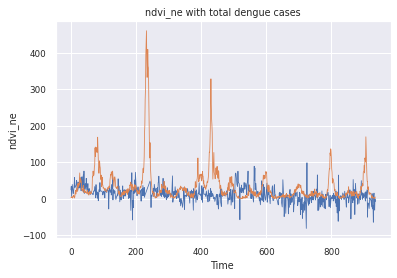

ndvi_nw


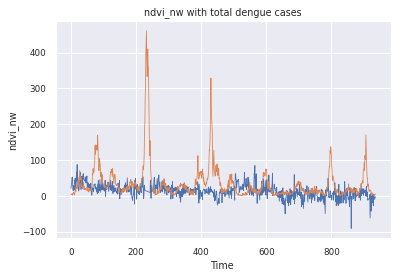

ndvi_se


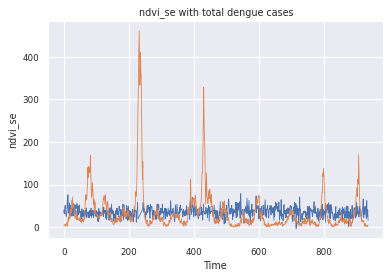

ndvi_sw


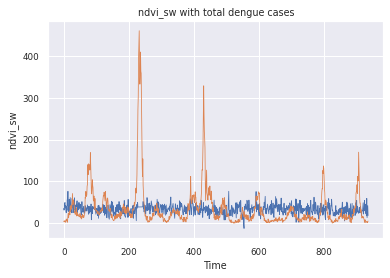

precipitation_amt_mm


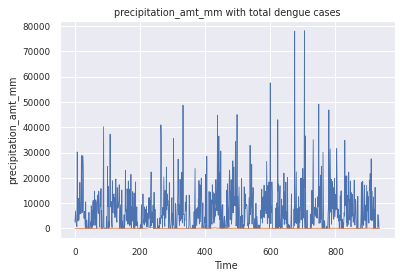

reanalysis_air_temp_k


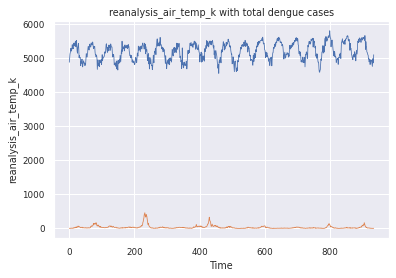

reanalysis_dew_point_temp_k


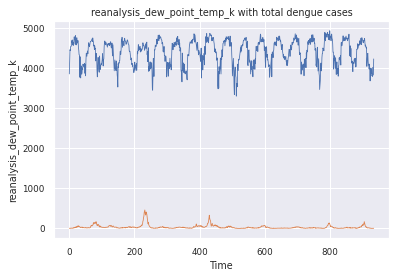

reanalysis_max_air_temp_k


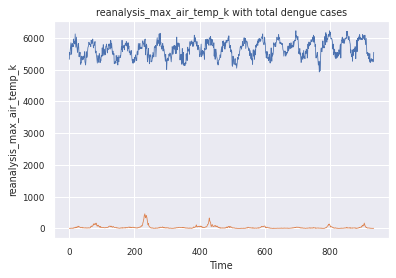

reanalysis_min_air_temp_k


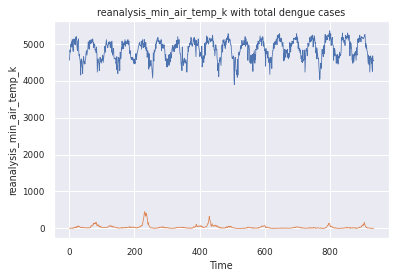

reanalysis_precip_amt_kg_per_m2


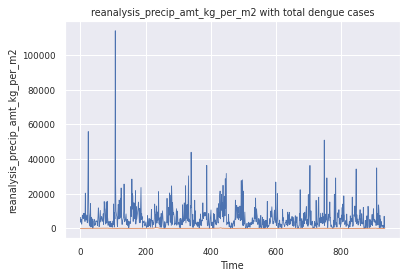

reanalysis_relative_humidity_percent


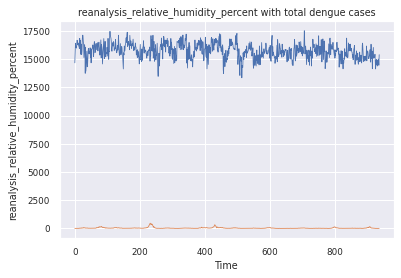

reanalysis_tdtr_k


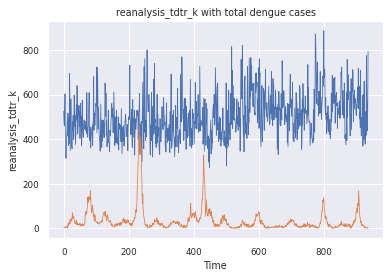

station_avg_temp_c


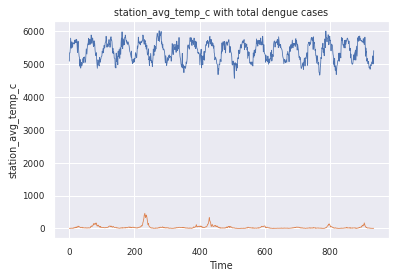

station_diur_temp_rng_c


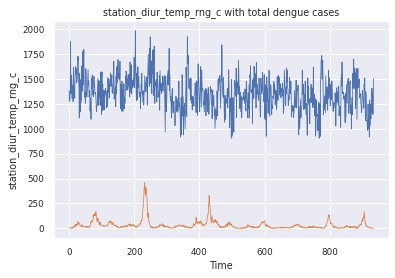

station_max_temp_c


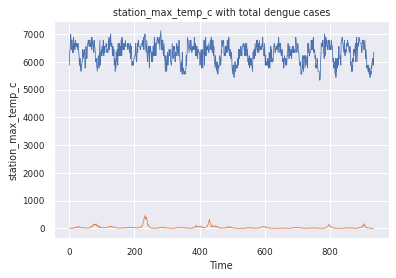

station_min_temp_c


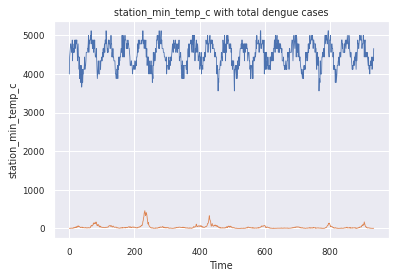

station_precip_mm


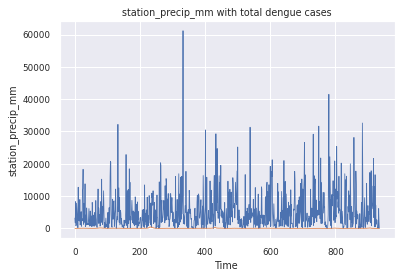

total_cases


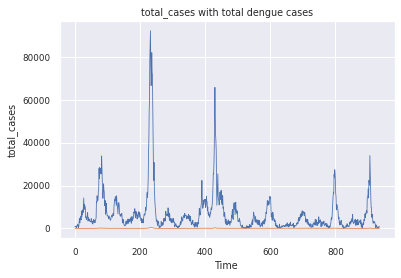

In [20]:
for variable in sj_scaled.columns:
  print(variable)
  ((sj_train[variable] * 200).plot.line(lw=0.8))
  ((sj_target.total_cases).plot.line(lw=0.8))
  plt.title(variable + ' with total dengue cases')
  plt.xlabel('Time')
  plt.ylabel(variable)
  plt.show()

ndvi_ne


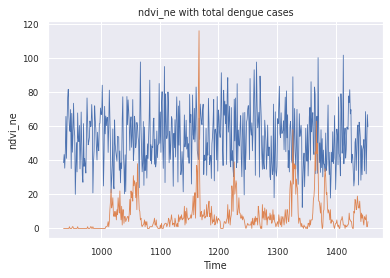

ndvi_nw


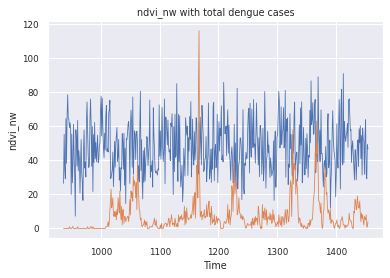

ndvi_se


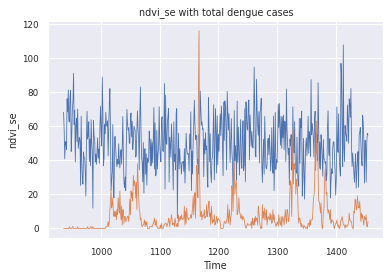

ndvi_sw


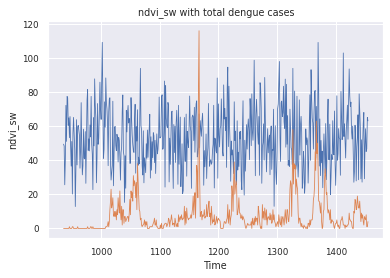

precipitation_amt_mm


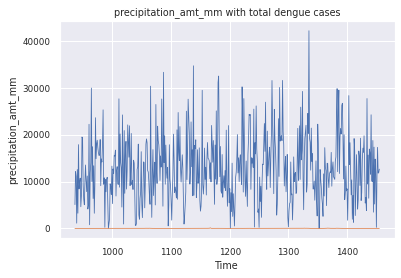

reanalysis_air_temp_k


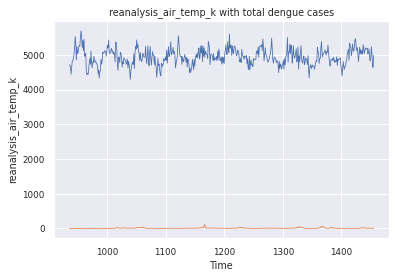

reanalysis_dew_point_temp_k


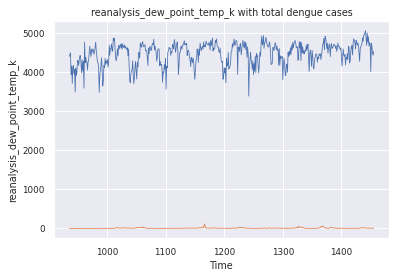

reanalysis_max_air_temp_k


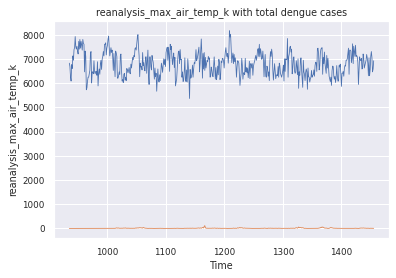

reanalysis_min_air_temp_k


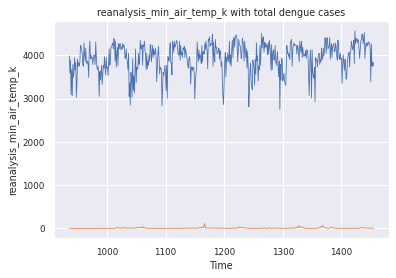

reanalysis_precip_amt_kg_per_m2


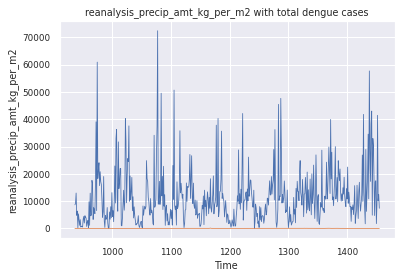

reanalysis_relative_humidity_percent


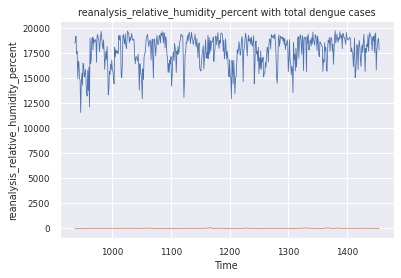

reanalysis_tdtr_k


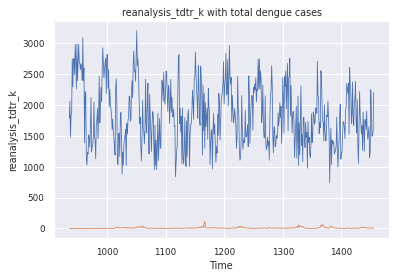

station_avg_temp_c


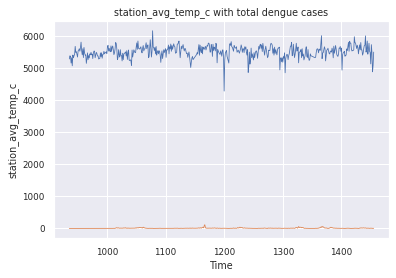

station_diur_temp_rng_c


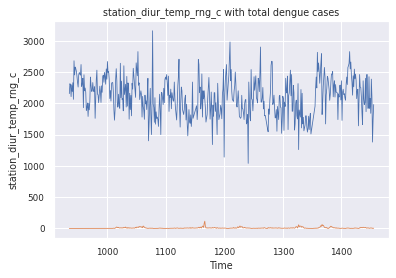

station_max_temp_c


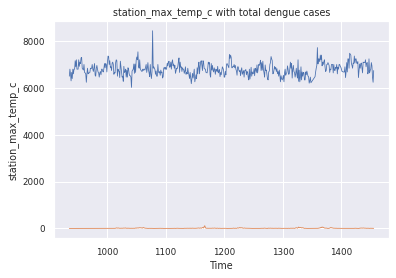

station_min_temp_c


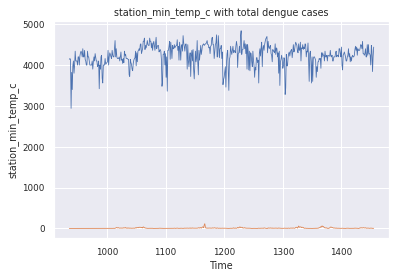

station_precip_mm


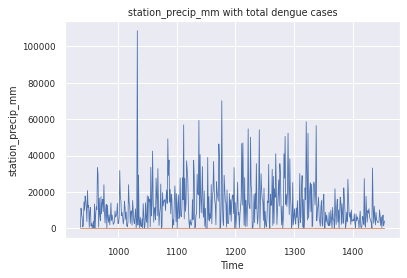

total_cases


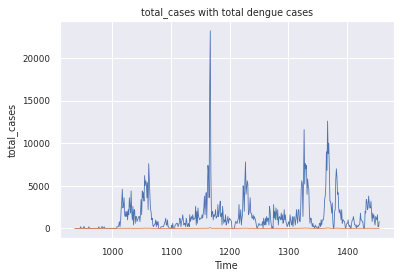

In [21]:
for variable in iq_scaled.columns:
  print(variable)
  ((iq_train[variable] * 200).plot.line(lw=0.8))
  ((iq_target.total_cases).plot.line(lw=0.8))
  plt.title(variable + ' with total dengue cases')
  plt.xlabel('Time')
  plt.ylabel(variable)
  plt.show()

In [22]:
sj_selected_features = ['reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'reanalysis_max_air_temp_k', 
                        'station_max_temp_c', 'reanalysis_min_air_temp_k', 'reanalysis_air_temp_k']

In [23]:
iq_selected_features = ['reanalysis_dew_point_temp_k', 'station_min_temp_c', 'reanalysis_min_air_temp_k']

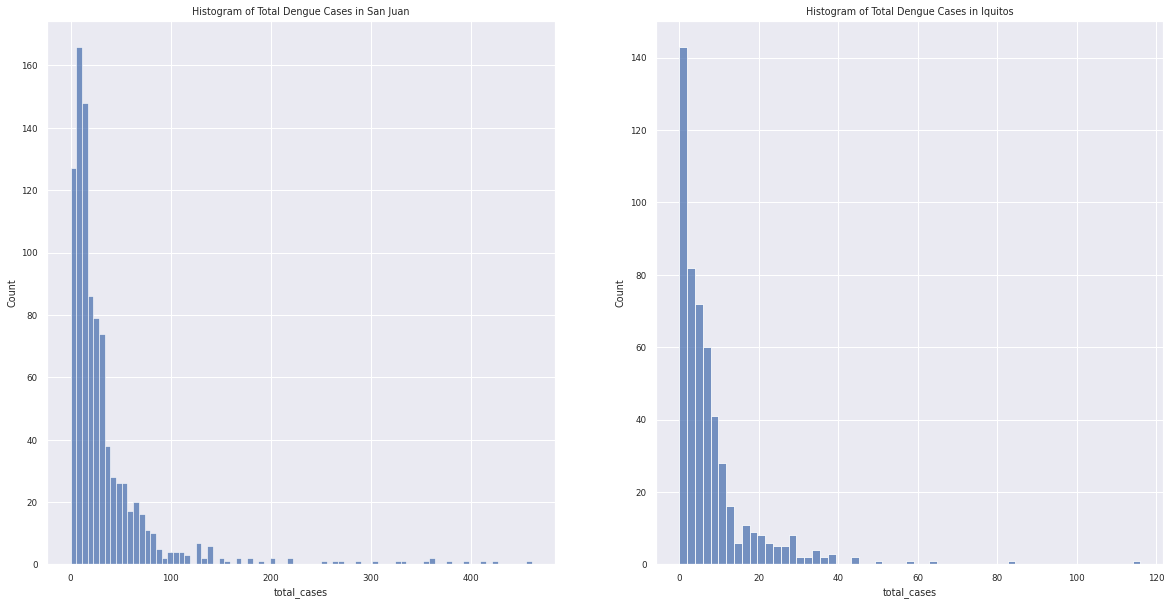

In [24]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
sns.histplot(sj_target['total_cases'])
plt.title('Histogram of Total Dengue Cases in San Juan')

plt.subplot(1, 2, 2)
sns.histplot(iq_target['total_cases'])
plt.title('Histogram of Total Dengue Cases in Iquitos')

plt.show()

In [25]:
print('Mean of San Juan test cases: ', np.mean(sj_target['total_cases']))
print('Variance of San Juan test cases: ', np.var(sj_target['total_cases']))
print('\n')
print('Mean of Iquitos test cases: ', np.mean(iq_target['total_cases']))
print('Variance of Iquitos test cases: ', np.var(iq_target['total_cases']))

Mean of San Juan test cases:  34.18055555555556
Variance of San Juan test cases:  2637.2248783238533


Mean of Iquitos test cases:  7.565384615384615
Variance of Iquitos test cases:  115.6726479289938


# Linear Regression

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

y_sj = list(sj_target.total_cases)
sj_X_train, sj_y_train = sj_scaled.iloc[:round(len(sj_scaled) * 0.8), :], y_sj[0:round(len(sj_scaled) * 0.8)]
sj_X_test, sj_y_test = sj_scaled.iloc[round(len(sj_scaled) * 0.8) + 1:, :], y_sj[round(len(sj_scaled) * 0.8) + 1:]


y_iq = list(iq_target.total_cases)
iq_X_train, iq_y_train = iq_scaled.iloc[:round(len(iq_scaled) * 0.8), :], y_iq[0:round(len(iq_scaled) * 0.8)]
iq_X_test, iq_y_test = iq_scaled.iloc[round(len(iq_scaled) * 0.8) + 1:, :], y_iq[round(len(iq_scaled) * 0.8) + 1:]


# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(sj_X_train[sj_selected_features], sj_y_train)
sj_prediction = LR.predict(sj_X_test[sj_selected_features])
print('SJ Linear Regression Model: ', mean_absolute_error(sj_prediction, sj_y_test))

# fitting the training data
LR.fit(iq_X_train[iq_selected_features], iq_y_train)
iq_prediction = LR.predict(iq_X_test[iq_selected_features])
print('IQ Linear Regression Model: ', mean_absolute_error(iq_prediction, iq_y_test))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


SJ Linear Regression Model:  24.876927963929745
IQ Linear Regression Model:  7.036937458859092


# Negative Binomial Regression

In [27]:
def best_nb_model(train, formula):
  f =  "total_cases ~ 1"
  for term in formula:
    f += ("+" + term)
  alpha_grid = np.linspace(0.01, 2, 100)
  best_alpha = 0
  best_mae = float("inf")
  for alpha in alpha_grid:
    train_X = train.iloc[:round(len(train) * 0.8), :]
    val_X = train.iloc[round(len(train) * 0.8) + 1:, :]
    nb_model = smf.glm(formula = f, data = train_X, family = sm.families.NegativeBinomial(alpha = alpha)).fit()
    cv_pred = map(int, map(round, nb_model.predict(val_X)))
    mae = mean_absolute_error(list(cv_pred), list(val_X.total_cases))
    if mae < best_mae:
      best_mae = mae
      best_alpha = alpha
  # print('NB Regression Model: ', best_mae)
  return smf.glm(formula = f, data = train, family = sm.families.NegativeBinomial(alpha = best_alpha)).fit()

SJ Negative Binomial Model:  24.682795698924732
IQ Negative Binomial Model:  6.970873786407767


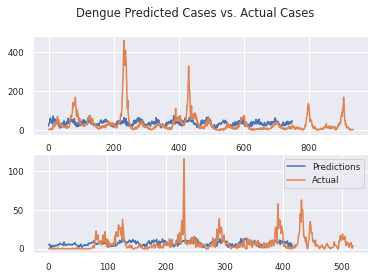

In [32]:
sj_nb = best_nb_model(sj_X_train, sj_selected_features)
sj_pred = map(int, map(round, sj_nb.predict(sj_X_test)))
print('SJ Negative Binomial Model: ', mean_absolute_error(list(sj_pred), list(sj_X_test.total_cases)))

iq_nb = best_nb_model(iq_X_train, iq_selected_features)
iq_pred = map(int, map(round, iq_nb.predict(iq_X_test)))
print('IQ Negative Binomial Model: ', mean_absolute_error(list(iq_pred), list(iq_X_test.total_cases)))

figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_NB_fitted = sj_nb.fittedvalues
sj_NB_fitted.plot(ax=axes[0], label="Predictions")
sj_scaled.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_NB_fitted = iq_nb.fittedvalues
iq_NB_fitted.plot(ax=axes[1], label="Predictions")
iq_scaled.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

# Poisson Regression

In [33]:
def best_poisson_model(train, formula):
  f =  "total_cases ~ 1"
  for term in formula:
    f += ("+" + term)
  model = smf.glm(formula = f, data = train, family = sm.families.Poisson()).fit()
  return model

SJ Poisson Model:  24.70967741935484
IQ NPoisson Model:  7.038834951456311


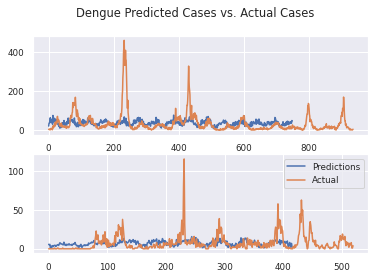

In [34]:
sj_p = best_poisson_model(sj_X_train, sj_selected_features)
sj_pred = map(int, map(round, sj_p.predict(sj_X_test)))
print('SJ Poisson Model: ', mean_absolute_error(list(sj_pred), list(sj_X_test.total_cases)))

iq_p = best_poisson_model(iq_X_train, iq_selected_features)
iq_pred = map(int, map(round, iq_p.predict(iq_X_test)))
print('IQ NPoisson Model: ', mean_absolute_error(list(iq_pred), list(iq_X_test.total_cases)))

figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_P_fitted = sj_p.fittedvalues
sj_P_fitted.plot(ax=axes[0], label="Predictions")
sj_scaled.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_P_fitted = iq_p.fittedvalues
iq_P_fitted.plot(ax=axes[1], label="Predictions")
iq_scaled.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

# Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

sj_correlations = pd.concat([sj_train.drop(['total_cases'], axis = 1), sj_train['total_cases']], axis=1).corr().total_cases.drop('total_cases')
iq_correlations = pd.concat([iq_train.drop(['total_cases'], axis = 1), iq_train['total_cases']], axis=1).corr().total_cases.drop('total_cases')

for i in sj_train.drop(['week_start_date', 'total_cases'], axis=1).columns.values:
  sj_train[i] = sj_train[i] * np.absolute(sj_correlations[i]) * 100
  iq_train[i] = iq_train[i] * np.absolute(iq_correlations[i]) * 100
    
sj_rf_train = sj_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1).head(800)
sj_rf_val = sj_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1).tail(sj_train.shape[0] - 800)
iq_rf_train = iq_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1).head(400)
iq_rf_val = iq_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1).tail(iq_train.shape[0] - 400)

sj_forest_model = RandomForestRegressor(n_estimators=10000)
sj_forest_model.fit(sj_rf_train, sj_target['total_cases'].head(800))

iq_forest_model = RandomForestRegressor(n_estimators=10000)
iq_forest_model.fit(iq_rf_train, iq_target['total_cases'].head(400))

sj_rf_pred = sj_forest_model.predict(sj_rf_val)
print('SJ Random Forest Regression Model: ', mean_absolute_error(list(sj_rf_pred), list(sj_target['total_cases'].tail(sj_train.shape[0] - 800))))

iq_rf_pred = iq_forest_model.predict(iq_rf_val)
print('IQ Random Forest Regression Model: ', mean_absolute_error(list(iq_rf_pred), list(iq_target['total_cases'].tail(iq_train.shape[0] - 400))))


SJ Random Forest Regression Model:  25.730905882352943
IQ Random Forest Regression Model:  7.458230833333333


# Create Submission File

In [36]:
sj = pd.DataFrame(data = scaler.fit_transform(sj_train.iloc[:, 2:]), columns = sj_scaled.columns)
iq = pd.DataFrame(data = scaler.fit_transform(iq_train.iloc[:, 2:]), columns = iq_scaled.columns)

sj_test_tmp = pd.DataFrame(data = scaler.fit_transform(sj_test.iloc[:, 2:]), columns = sj_scaled.columns[0:len(sj_scaled.columns) - 1])
iq_test_tmp = pd.DataFrame(data = scaler.fit_transform(iq_test.iloc[:, 2:]), columns = iq_scaled.columns[0:len(iq_scaled.columns) - 1])


sj['total_cases'] = list(sj_target['total_cases'])
iq['total_cases'] = list(iq_target['total_cases'])

sj_nb = best_nb_model(sj, sj_selected_features)
sj_pred = pd.Series(map(int, map(round, sj_nb.predict(sj_test_tmp))))

iq_nb = best_nb_model(iq, iq_selected_features)
iq_pred = pd.Series(map(int, map(round, iq_nb.predict(iq_test_tmp))))

submission = pd.read_csv('/content/dengue_data/submission_format.csv')
submission_ = sj_pred.append(iq_pred, ignore_index=True)
submission['total_cases'] = submission_
submission.to_csv('nb_submission.csv', index = False)

In [37]:
sj = sj_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1)
iq = iq_train.drop(['weekofyear', 'week_start_date', 'total_cases'], axis = 1)

sj_test_tmp = sj_test.drop(['weekofyear', 'week_start_date'], axis = 1)
iq_test_tmp = iq_test.drop(['weekofyear', 'week_start_date'], axis = 1)

sj_correlations = pd.concat([sj, sj_train['total_cases']], axis=1).corr().total_cases.drop('total_cases')
iq_correlations = pd.concat([iq, iq_train['total_cases']], axis=1).corr().total_cases.drop('total_cases')

for i in sj.columns.values:
  sj[i] = sj[i] * np.absolute(sj_correlations[i]) * 100
  iq[i] = iq[i] * np.absolute(iq_correlations[i]) * 100

sj_forest_model = RandomForestRegressor(n_estimators=10000)
sj_forest_model.fit(sj, sj_target['total_cases'])

iq_forest_model = RandomForestRegressor(n_estimators=10000)
iq_forest_model.fit(iq, iq_target['total_cases'])

sj_pred = pd.Series(map(int, map(round, sj_forest_model.predict(sj_test_tmp))))
iq_pred = pd.Series(map(int, map(round, iq_forest_model.predict(iq_test_tmp))))

submission = pd.read_csv('/content/dengue_data/submission_format.csv')
submission_ = sj_pred.append(iq_pred, ignore_index=True)
submission['total_cases'] = submission_
submission.to_csv('rf_submission.csv', index = False)